In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AI Quest/Assignment-12/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

#**Encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
from pandas.core.dtypes.common import is_numeric_dtype

In [11]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    continue
  else:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#**Correlation of data**

In [13]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


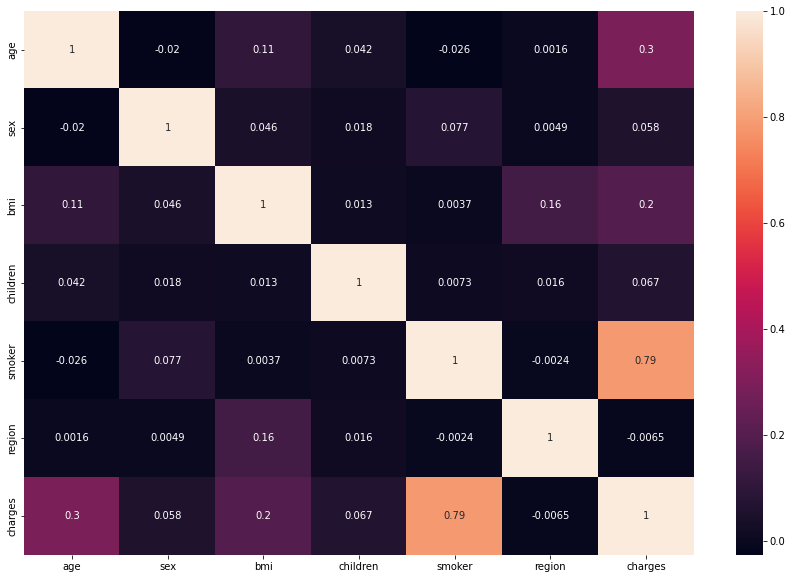

In [14]:
plt.subplots(figsize = (15,10)) 
sns.heatmap(df.corr(), annot = True)

#**Splitting train and test data** 

In [15]:
x = df.drop("charges", axis = 1)
y = df["charges"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42) 

###**Fitting the model**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

###**Predicting value using built-in method**

In [20]:
reg.predict([[28, 1, 33.000, 3, 0, 2]])

array([7109.93211556])

In [21]:
reg.intercept_

-11502.550522993792

In [22]:
reg.coef_

array([  252.03741011,  -110.31315941,   322.2408649 ,   524.49382188,
       22855.75293908,  -270.84084621])

###**Accuracy of the model using LinearRegression()**

In [23]:
reg.score(xtest, ytest)

0.7724652729621758

###**Predicting value manually**

In [24]:
x1, x2, x3, x4, x5, x6 = 28, 1, 33.000, 3, 0, 2
m1, m2, m3, m4, m5, m6 = 252.03741011, -110.31315941, 322.2408649, 524.49382188, 22855.75293908, -270.84084621
c = -11502.550522993792

In [25]:
y_pred = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + c
y_pred

7109.93211559621

In [26]:
ypred = reg.predict(xtest)
ypred

array([ 7992.22248609,  5341.35326047, 14378.73188133, 31440.55293339,
        9078.42878582, 13331.53020663, 30015.62300825,  1060.20297782,
       10802.53466614, 11284.70044629, 10396.95048808, 32894.50379973,
       30669.54048862, 17237.80701055, 10643.51222293,  9213.5977002 ,
        3773.80434473, 31641.92659452,  2813.68258367,  5324.45369199,
        3630.46452846, 29871.53008128, 15107.82863757, 29903.73601081,
       30848.81403335,  5405.34217344, 35454.94330799, 36122.11169322,
       11290.35021579, 14062.73810237,  6321.02165848, 12917.2878143 ,
         421.27879848, 11830.93858194, 39698.98027441, 12083.96625533,
        4312.19557599,  3789.91765443, 30794.02437636,  9112.83873186,
        6869.07012676, 29699.1168314 , 34703.301575  , 12173.91799125,
        7298.02239426,  3055.78873581,  6013.98489716,  8682.0312554 ,
        4165.46676689,  9145.17083402,  6695.75145308, 11961.77940414,
       30858.33152863,  3626.49085448, 10745.39561068,  9873.66045747,
      

#**Finding the R-squared value**

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2s = r2_score(ytest, ypred)
r2s

0.7724652729621758